<a href="https://colab.research.google.com/github/SaranyaLakshmiMarreddy/IT7103-Assignments/blob/main/Assignment1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## **Saranya Lakshmi Marreddy**

***IT7103 Summer 2024***

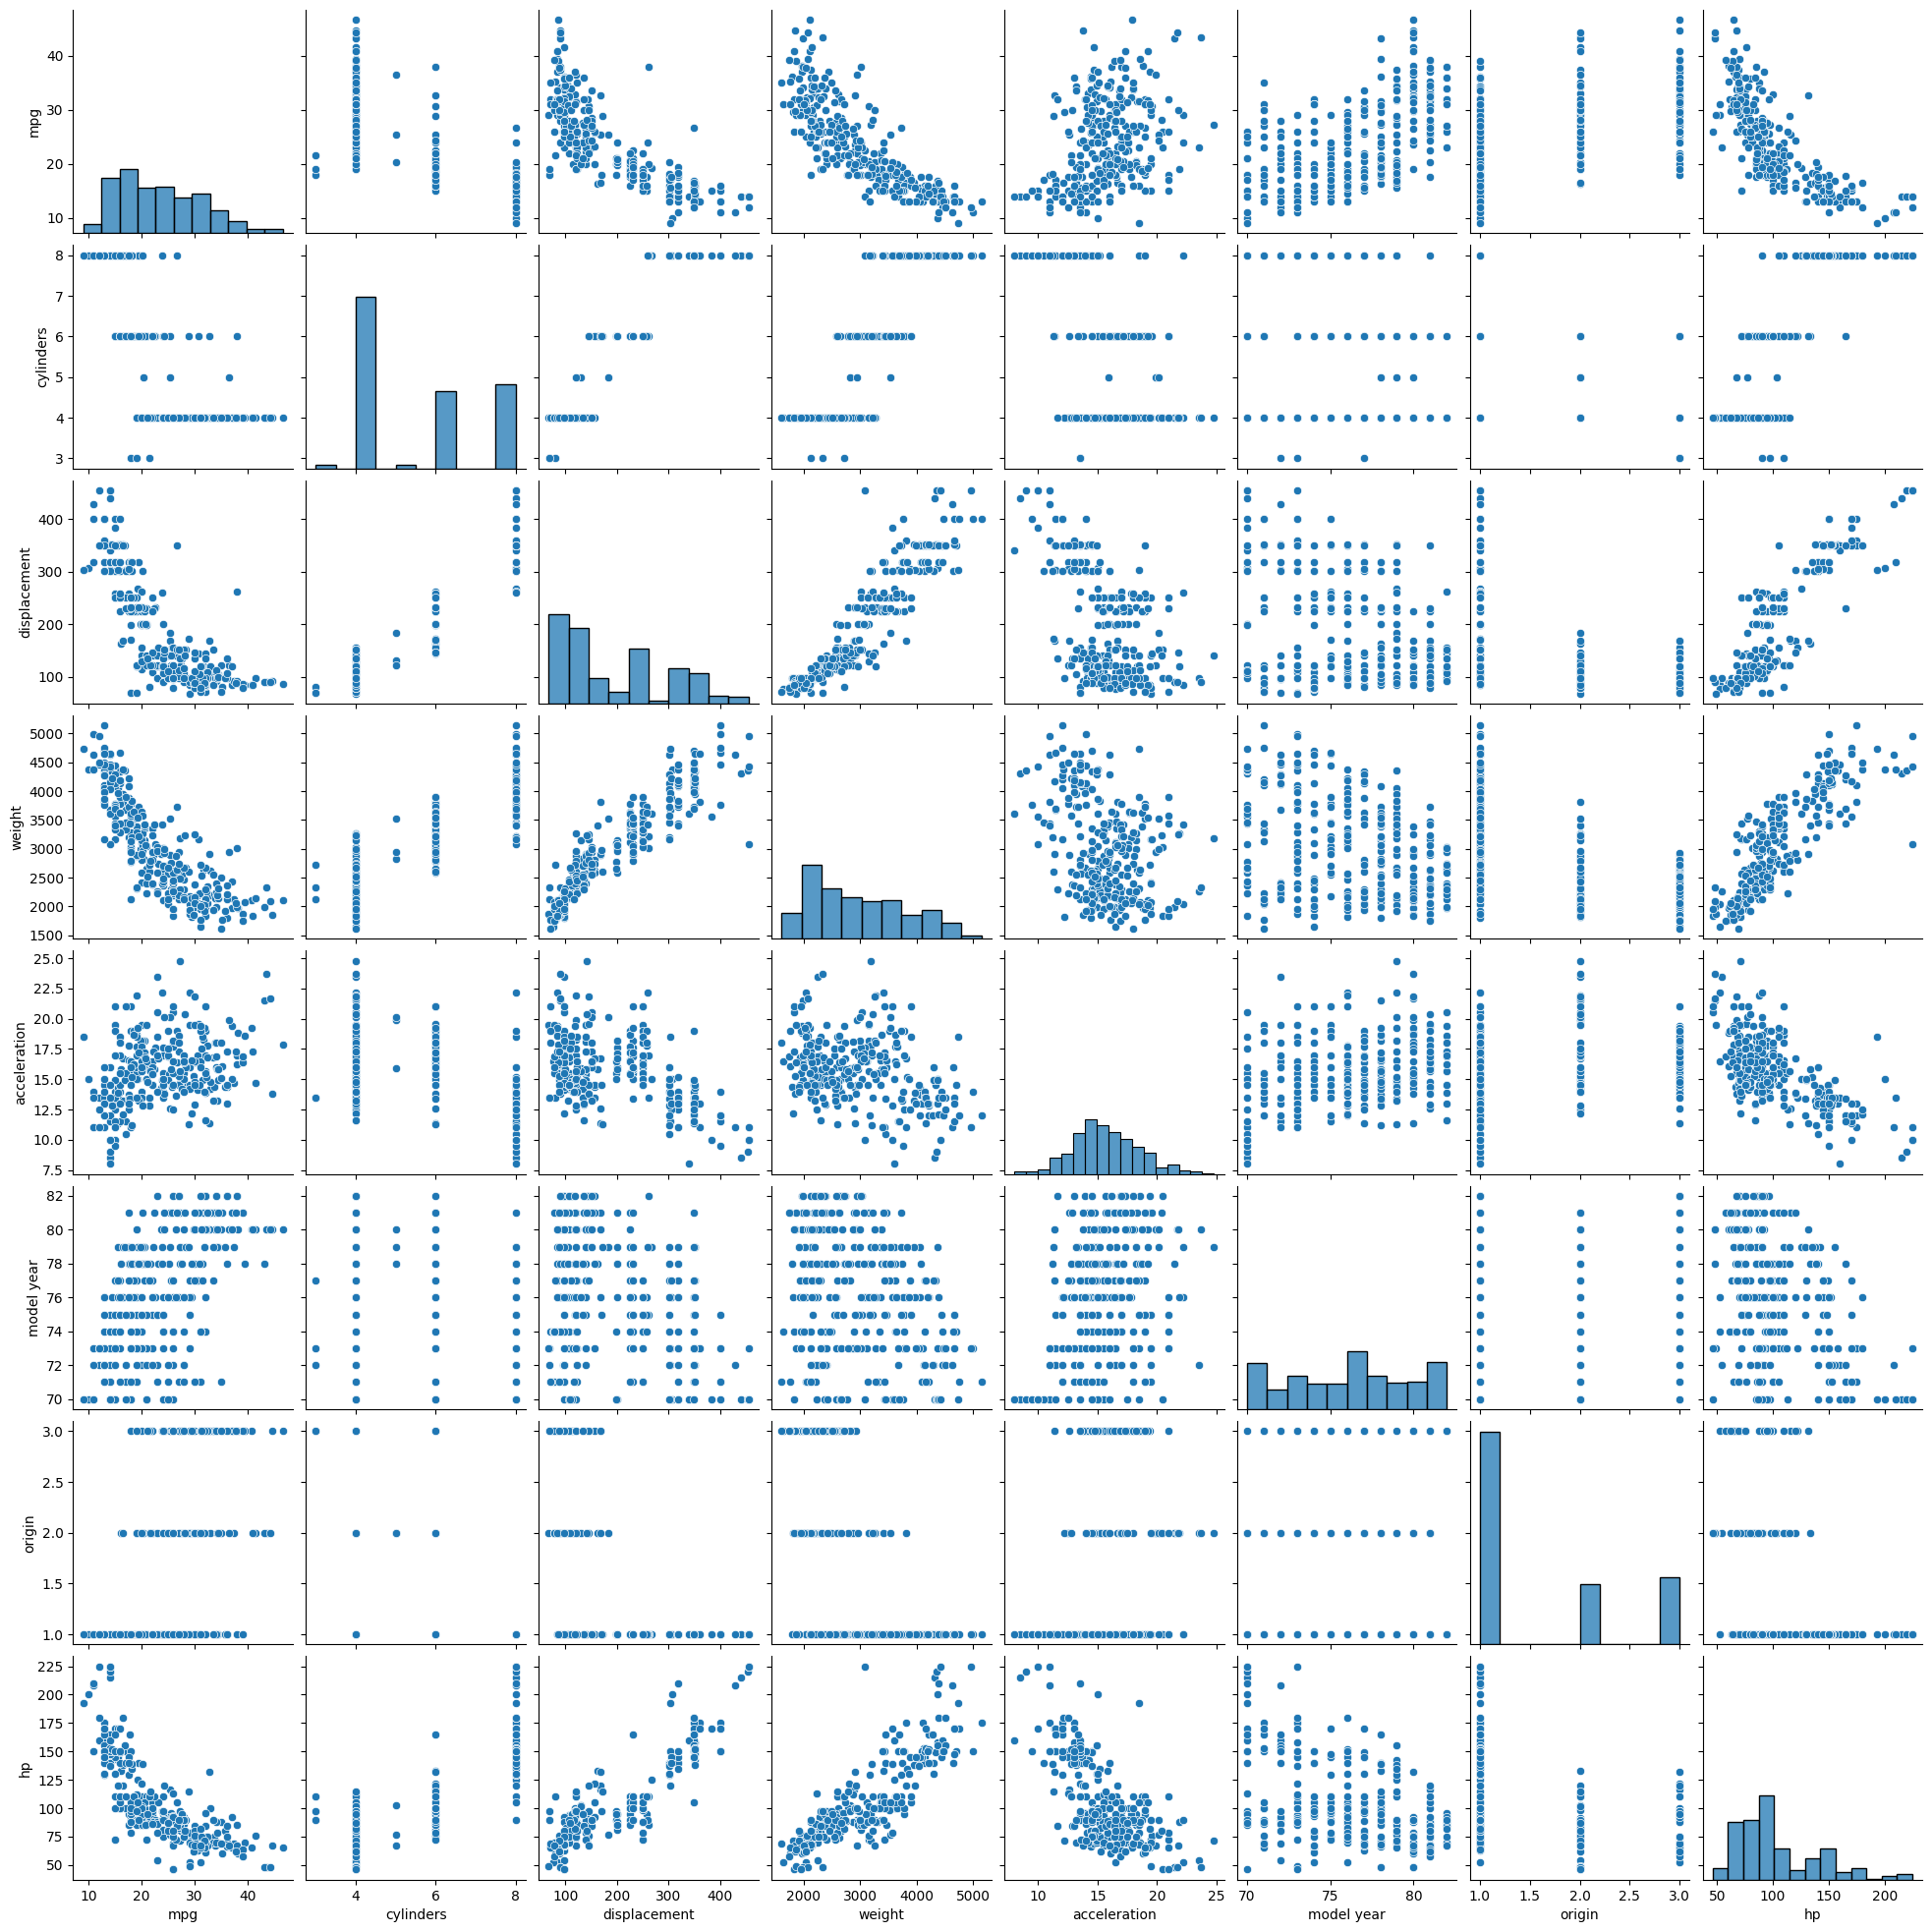

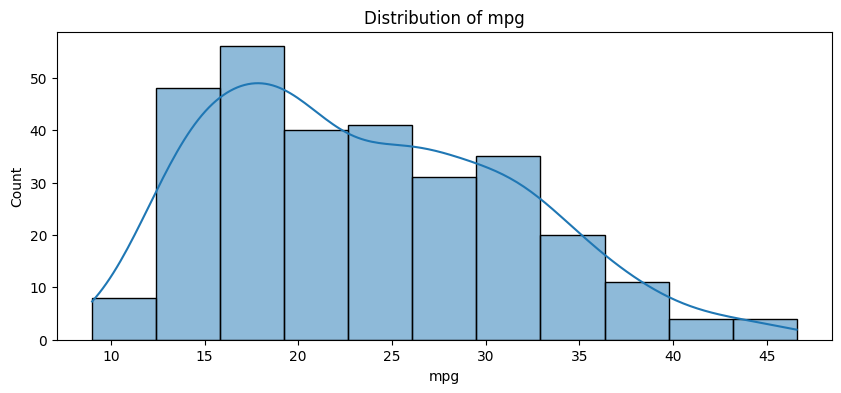

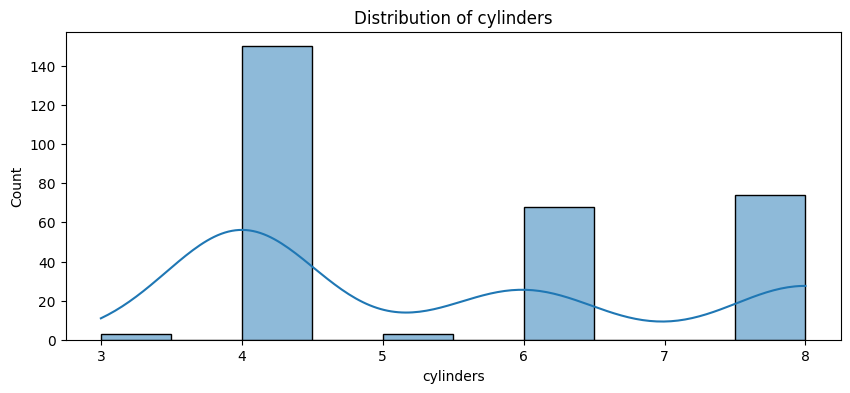

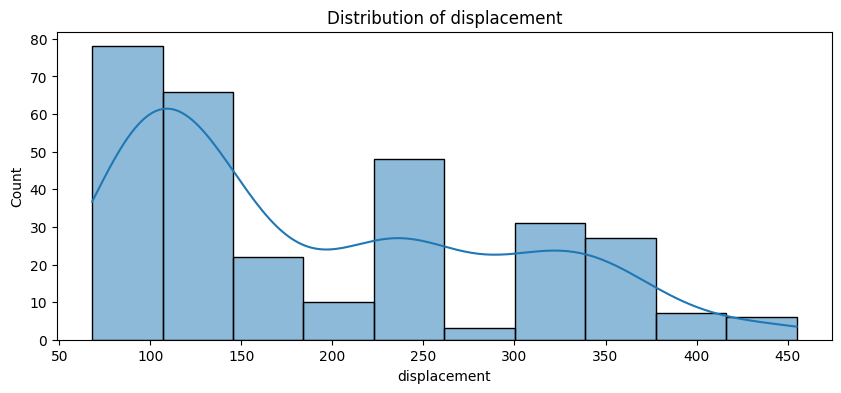

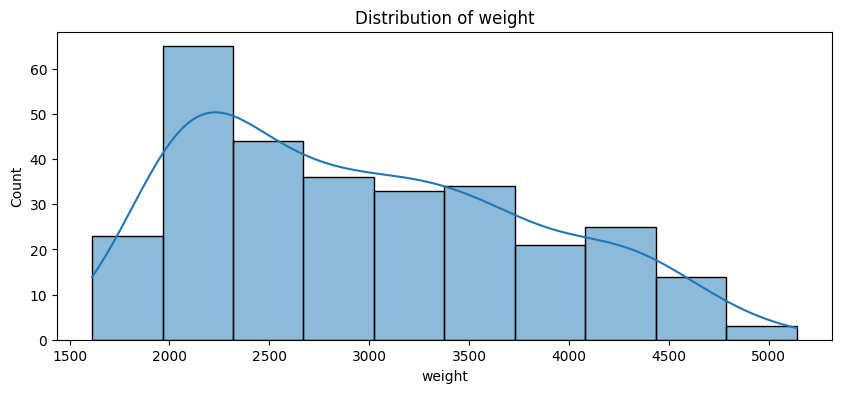

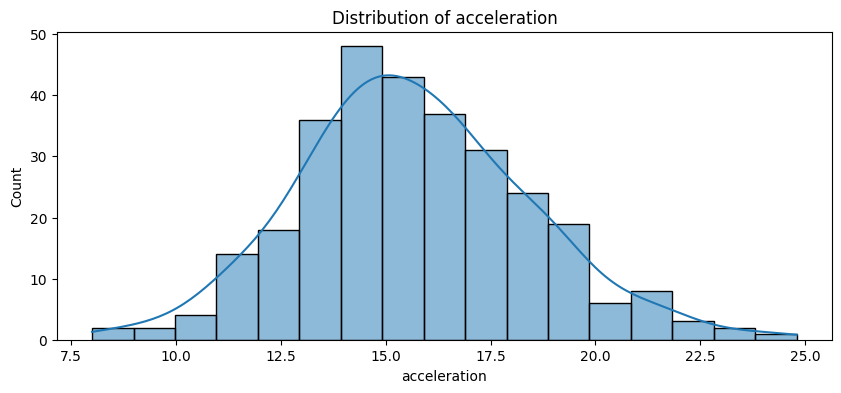

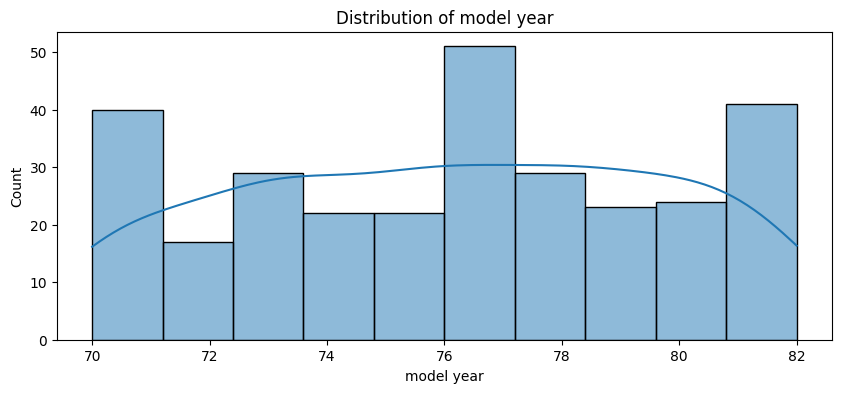

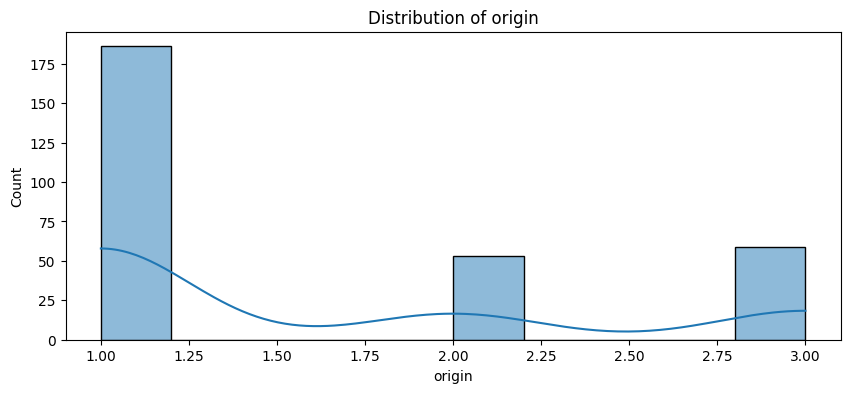

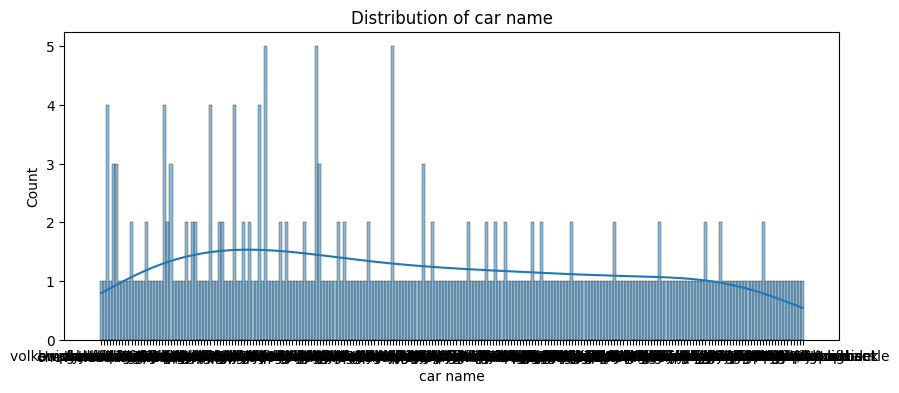

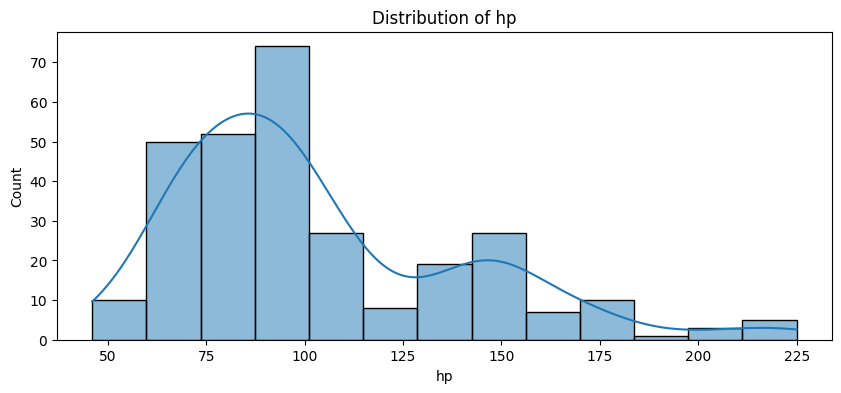

Processed training data shape: (298, 26)
Processed testing data shape: (100, 26)


In [4]:
# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler, OneHotEncoder, FunctionTransformer

# Load the data into a DataFrame
df = pd.read_csv('auto-mpg.csv')

# Check data types and fix if necessary
df['hp'] = pd.to_numeric(df['horsepower'], errors='coerce')
df.drop(columns=['horsepower'], inplace=True)

# Split the data into training and testing sets
train_df, test_df = train_test_split(df, test_size=0.25, random_state=42)

# Visualize necessary columns in the data
# Pairplot for visualizing relationships and distributions
sns.pairplot(train_df)
plt.show()

# Histograms for individual columns
for col in df.columns:
    plt.figure(figsize=(10, 4))
    sns.histplot(train_df[col], kde=True)
    plt.title(f'Distribution of {col}')
    plt.show()

# Identify columns by their types
num_sym_cols = ['mpg', 'displacement', 'weight', 'acceleration']  # Assume these are symmetric for this example
num_skew_cols = ['hp']  # Assume this is skewed for this example
cat_cols = ['cylinders', 'model year', 'origin']  # Assume these are categorical for this example

# Build the pipeline
# Transformer for numeric symmetric columns
num_sym_trans = Pipeline(steps=[
    ('imp', SimpleImputer(strategy='mean')),
    ('scl', StandardScaler())
])

# Transformer for numeric skewed columns
num_skew_trans = Pipeline(steps=[
    ('imp', SimpleImputer(strategy='mean')),
    ('log', FunctionTransformer(np.log1p, validate=True)),
    ('scl', StandardScaler())
])

# Transformer for categorical columns
cat_trans = Pipeline(steps=[
    ('imp', SimpleImputer(strategy='most_frequent')),
    ('ohe', OneHotEncoder())
])

# Combine transformers using ColumnTransformer
preproc = ColumnTransformer(
    transformers=[
        ('num_sym', num_sym_trans, num_sym_cols),
        ('num_skew', num_skew_trans, num_skew_cols),
        ('cat', cat_trans, cat_cols)
    ])

# Train the pipeline on the training data
preproc.fit(train_df)

# Perform transformation on the training data and testing data
train_proc = preproc.transform(train_df)
test_proc = preproc.transform(test_df)

# Print the shape of the processed training data and processed testing data
print(f'Processed training data shape: {train_proc.shape}')
print(f'Processed testing data shape: {test_proc.shape}')